# HOST COUNTRY ANALYSIS.
### DOES HOSTING THE OLYMPIC GAMES IMPROVE PERFORMANCE?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact

In [2]:
# Load olympic data in csv
athelete_df = pd.read_csv("/Users/jelenaraonic/UofTBootcamp/PROJECT1/project1/Data/athlete_events.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Load country information in csv
regions_df = pd.read_csv("/Users/jelenaraonic/UofTBootcamp/PROJECT1/project1/Data/noc_regions.csv")
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# Merge the dataframes
athelete_merged_df = pd.merge(athelete_df,regions_df,on='NOC',how='left')
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [5]:
# Data cleanup
athelete_merged_df['Medal'].fillna('DNW', inplace = True)
athelete_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [6]:
athelete_merged_df.replace('USA', "United States of America", inplace = True)
athelete_merged_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
athelete_merged_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
athelete_merged_df.replace('Congo', "Republic of the Congo", inplace = True)
athelete_merged_df.replace('Lao', "Laos", inplace = True)
athelete_merged_df.replace('Syrian Arab Republic', "Syria", inplace = True)
athelete_merged_df.replace('Serbia', "Republic of Serbia", inplace = True)
athelete_merged_df.replace('Czechia', "Czech Republic", inplace = True)
athelete_merged_df.replace('UAE', "United Arab Emirates", inplace = True)
athelete_merged_df.replace('UK', "United Kingdom", inplace = True)

In [7]:
athelete_merged_df[['region','Team','NOC']]

,region,Team,NOC
0,China,China,CHN
1,China,China,CHN
2,Denmark,Denmark,DEN
3,Denmark,Denmark/Sweden,DEN
4,Netherlands,Netherlands,NED
...,...,...,...
271111,Poland,Poland-1,POL
271112,Poland,Poland,POL
271113,Poland,Poland,POL
271114,Poland,Poland,POL


In [8]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis" or col=="Lake Placid" or col=="Salt Lake City" or col=="Squaw Valley":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva" or col=="Sochi":
        return  "Russia"
    elif col == "Montreal" or col == "Calgary" or col=="Vancouver":
        return  "Canada"
    elif col == "Munich" or col == "Berlin" or col=="Garmisch-Partenkirchen":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo" or col=="Nagano" or col=="Sapporo":
        return  "Japan"
    elif col == "Roma" or col=="Cortina d'Ampezzo" or col=="Torino":
        return  "Italy"
    elif col == "Paris" or col=="Albertville" or col == "Chamonix" or col=="Grenoble":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col == "Innsbruck":
        return  "Austria"
    elif col == "Lillehammer" or col=="Oslo":
        return  "Norway"
    elif col == "Sankt Moritz":
        return  "Switzerland"
    else:
        return "Other"


# Applying this function

athelete_merged_df['Host_Country'] = athelete_merged_df['City'].apply(host_country)

In [9]:
# DataFrame with a hosting country of Olympic Games

athelete_merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,Canada


In [10]:
#Creating new dataframe containing host nation data and medal won by each country 
host_country = athelete_merged_df.groupby(['Host_Country','Year','Season','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country.head()

,Host_Country,Year,Season,region,Medal_Count
0,Australia,1956,Summer,Afghanistan,12
1,Australia,1956,Summer,Argentina,31
2,Australia,1956,Summer,Australia,405
3,Australia,1956,Summer,Austria,49
4,Australia,1956,Summer,Bahamas,5


#### WINTER OLYMPIC GAMES 

In [11]:
# Let's look into Olympic Winter games and medals that were won 
athelete_merged_WINTER = athelete_merged_df[(athelete_merged_df['Medal']!='DNW') & (athelete_merged_df['Season']=='Winter')]


In [12]:
athelete_merged_WINTER.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,Russia
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,France
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,NaN,France
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NaN,Norway
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,Norway,NaN,Norway


Text(0.5, 1.0, 'Countries at the Winter Olympic Games')

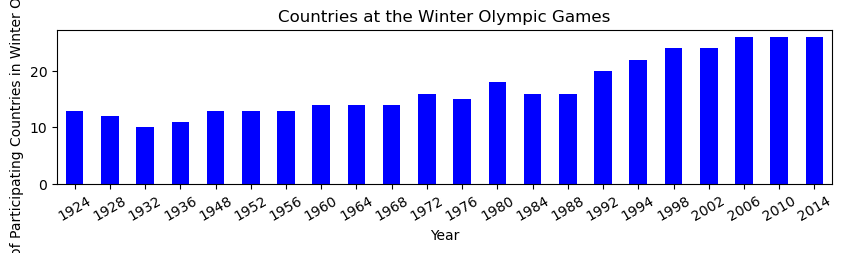

In [13]:
plt.figure(figsize=(10,2))
athelete_merged_WINTER.groupby('Year')['region'].nunique().plot(kind='bar',color='blue')
plt.xticks(rotation = 30)
plt.ylabel("Number of Participating Countries in Winter Olympic Games")
plt.title("Countries at the Winter Olympic Games")

Text(0.5, 1.0, 'Athletes at the Winter Olympic Games by Sex')

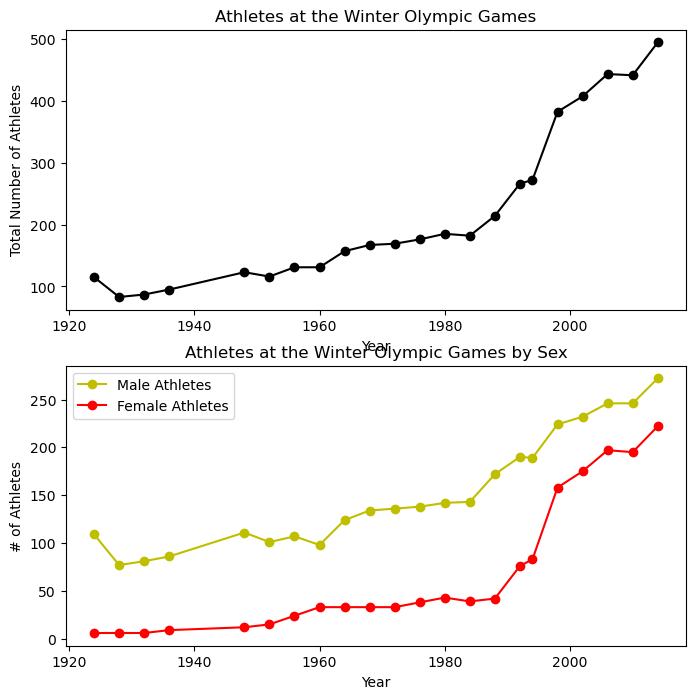

In [14]:
#Look at athletes participation over Winter Olympic games

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
athelete_merged_WINTER.groupby('Year')['ID'].nunique().plot(color='k',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Winter Olympic Games")
plt.subplot(2,1,2)
athelete_merged_WINTER.loc[athelete_merged_WINTER['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='y',marker='o',label='Male Athletes')
athelete_merged_WINTER.loc[athelete_merged_WINTER['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("# of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Winter Olympic Games by Sex")


##### HOSTING THE WINTER OLYMPIC GAMES 

In [15]:
# Let's look into all winter games and their hosts
host_country_WINTER = athelete_merged_WINTER.groupby(['Host_Country','Year','Season','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_WINTER.head()

,Host_Country,Year,Season,region,Medal_Count
0,Austria,1964,Winter,Austria,17
1,Austria,1964,Winter,Canada,7
2,Austria,1964,Winter,Czech Republic,17
3,Austria,1964,Winter,Finland,15
4,Austria,1964,Winter,France,7


Text(0.5, 0, '')

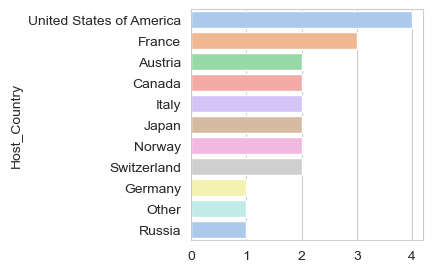

In [38]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(3,3))
hosts = host_country_WINTER[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=hosts,order = hosts['Host_Country'].value_counts().index,
              palette=sns.color_palette("pastel"))
plt.xlabel('')

#### SUMMER OLYMPIC GAMES 

In [16]:
# Let's look into Olympic summer games and medals that were won 
athelete_merged_SUMMER = athelete_merged_df[(athelete_merged_df['Medal']!='DNW') & (athelete_merged_df['Season']=='Summer')]
athelete_merged_SUMMER.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,Belgium
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,Belgium
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,United Kingdom
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,United Kingdom


Text(0.5, 1.0, 'Countries at the Summer Olympic Games')

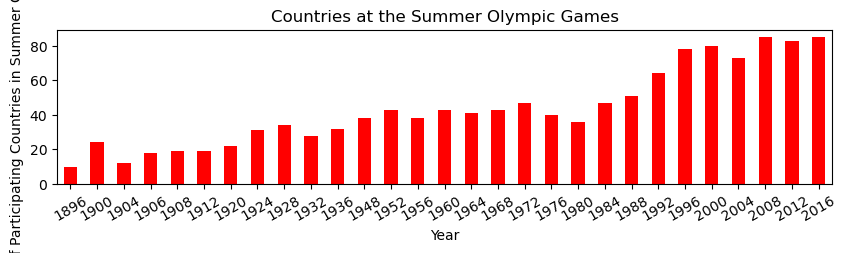

In [17]:

plt.figure(figsize=(10,2))
athelete_merged_SUMMER.groupby('Year')['region'].nunique().plot(kind='bar',color='red')
plt.xticks(rotation = 30)
plt.ylabel("Number of Participating Countries in Summer Olympic Games")
plt.title("Countries at the Summer Olympic Games")

Text(0.5, 1.0, 'Athletes at the Summer Olympic Games by Sex')

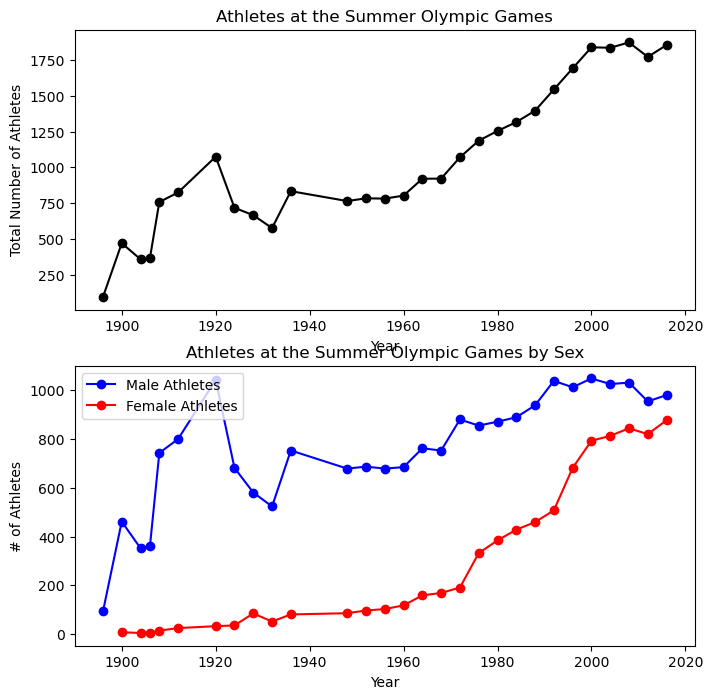

In [18]:
#Look at athletes participation over summer

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
athelete_merged_SUMMER.groupby('Year')['ID'].nunique().plot(color='k',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Summer Olympic Games")
plt.subplot(2,1,2)
athelete_merged_SUMMER.loc[athelete_merged_SUMMER['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='b',marker='o',label='Male Athletes')
athelete_merged_SUMMER.loc[athelete_merged_SUMMER['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("# of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Summer Olympic Games by Sex")


In [19]:
# Let's look into all summer games and their hosts
host_country_SUMMER = athelete_merged_SUMMER.groupby(['Host_Country','Year','Season','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_SUMMER.head(5)

,Host_Country,Year,Season,region,Medal_Count
0,Australia,1956,Summer,Argentina,2
1,Australia,1956,Summer,Australia,67
2,Australia,1956,Summer,Austria,4
3,Australia,1956,Summer,Bahamas,2
4,Australia,1956,Summer,Belgium,2


Text(0.5, 0, '')

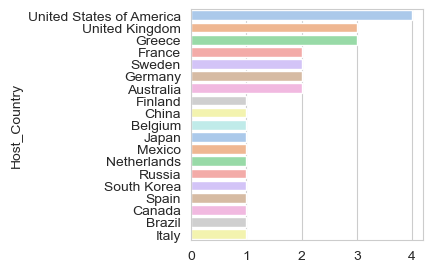

In [39]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(3,3))
hosts = host_country_SUMMER[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=hosts,order = hosts['Host_Country'].value_counts().index,
              palette=sns.color_palette("pastel"))
plt.xlabel('')

# HOW DID CANADA PERFORM ON OLYMPIC GAMES

##### Canada had an increadible honor to host Olympic games 3 times.

In [21]:
#Let see where and when Canada performed on Olymipc games
Canada_performance = host_country[host_country['region'] =='Canada']
Canada_performance.head()


,Host_Country,Year,Season,region,Medal_Count
9,Australia,1956,Summer,Canada,143
97,Australia,2000,Summer,Canada,422
268,Austria,1964,Winter,Canada,95
305,Austria,1976,Winter,Canada,109
339,Belgium,1920,Summer,Canada,85


In [22]:
#Canada performing on Olymipc winter games
Canada_performance_winter = host_country_WINTER[host_country_WINTER['region'] =='Canada']


In [23]:
#Canada performing on Olymipc summer games
Canada_performance_summer = host_country_SUMMER[host_country_SUMMER['region'] =='Canada']



In [24]:
#Team_Canada = athelete_merged_df.query('Team == "Canada"')
Team_Canada = athelete_merged_df[athelete_merged_df['region'] == "Canada"]
Team_Canada.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
269,140,"William ""Bill"" Abbott Jr.",M,42.0,172.0,80.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,DNW,Canada,NaN,United States of America
270,140,"William ""Bill"" Abbott Jr.",M,46.0,172.0,80.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Three Person Keelboat,DNW,Canada,NaN,Australia
279,146,Jeremy Abbott,M,19.0,179.0,71.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",DNW,Canada,NaN,Canada
280,147,Joanne Abbott,F,41.0,160.0,57.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,DNW,Canada,NaN,United States of America


In [25]:
Team_Canada_medals =  athelete_merged_df[(athelete_merged_df.Medal != 'DNW') & (athelete_merged_df.Team == 'Canada')]

In [26]:
gold_medals_Canada = athelete_merged_df[(athelete_merged_df.Medal == 'Gold') & (athelete_merged_df.Team == 'Canada')]
gold_medals_Canada.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
673,392,George Gordon Abel,M,35.0,NaN,NaN,Canada,CAN,1952 Winter,1952,Winter,Oslo,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold,Canada,NaN,Norway
1366,772,"Michael B. ""Mike"" Adam",M,24.0,175.0,95.0,Canada,CAN,2006 Winter,2006,Winter,Torino,Curling,Curling Men's Curling,Gold,Canada,NaN,Italy
2126,1181,Meghan Christina Agosta (-Marciano),F,18.0,168.0,67.0,Canada,CAN,2006 Winter,2006,Winter,Torino,Ice Hockey,Ice Hockey Women's Ice Hockey,Gold,Canada,NaN,Italy
2127,1181,Meghan Christina Agosta (-Marciano),F,23.0,168.0,67.0,Canada,CAN,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Women's Ice Hockey,Gold,Canada,NaN,Canada


In [27]:
silver_medals_Canada = athelete_merged_df[(athelete_merged_df.Medal == 'Silver') & (athelete_merged_df.Team == 'Canada')]
silver_medals_Canada.head(4)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
2748,1530,"Gordon ""Gord"" Aitchison",M,27.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Silver,Canada,NaN,Germany
4507,2575,Lisa Alexander,F,27.0,172.0,58.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Synchronized Swimming,Synchronized Swimming Women's Team,Silver,Canada,NaN,United States of America
5116,2909,"Ian Alistair ""Al"" Allison",M,27.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Silver,Canada,NaN,Germany
6786,3808,David Anderson,M,23.0,190.0,86.0,Canada,CAN,1960 Summer,1960,Summer,Roma,Rowing,Rowing Men's Coxed Eights,Silver,Canada,NaN,Italy


In [28]:
bronze_medals_Canada = athelete_merged_df[(athelete_merged_df.Medal == 'Bronze') & (athelete_merged_df.Team == 'Canada')]
bronze_medals_Canada.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
476,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,Canada,NaN,United States of America
684,395,Jennifer Abel,F,20.0,160.0,62.0,Canada,CAN,2012 Summer,2012,Summer,London,Diving,Diving Women's Synchronized Springboard,Bronze,Canada,NaN,United Kingdom
2810,1561,Mobolade Abimbola Ajomale,M,20.0,180.0,62.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze,Canada,NaN,Brazil
4524,2583,Buffy-Lynne Alexander-Williams,F,23.0,170.0,69.0,Canada,CAN,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,Bronze,Canada,NaN,Australia
6338,3552,Gail Amundrud (-Beattie),F,19.0,183.0,70.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Canada,NaN,Canada


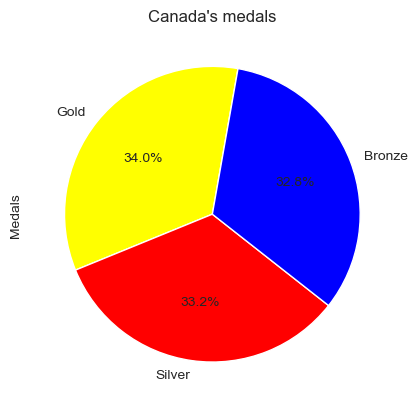

In [29]:

medal_counts_Canada = ['Gold','Silver','Bronze']
number = [422, 413, 408]

colors = ['yellow','red','blue']
explode = (0.1,0)

plt.pie(number, labels=medal_counts_Canada, colors=colors, autopct="%1.1f%%", startangle=80)

plt.ylabel("Medals")
plt.title("Canada's medals")
plt.show()

##### HOW DID CANADA PERFORM WHILE HOSTING THE OLYMPIC GAMES

### Canada had an increadible honor to host Olympic games 3 times.

In [30]:
# CANADA as host of Olympic games 
canada_host_df = host_country[(host_country['region'] =='Canada') & (host_country['Host_Country'] =='Canada')]
canada_host_df


,Host_Country,Year,Season,region,Medal_Count
581,Canada,1976,Summer,Canada,531
664,Canada,1988,Winter,Canada,190
727,Canada,2010,Winter,Canada,308


In [31]:
Canada_df = host_country[host_country['region'] =='Canada']
Canada_df.head()

,Host_Country,Year,Season,region,Medal_Count
9,Australia,1956,Summer,Canada,143
97,Australia,2000,Summer,Canada,422
268,Austria,1964,Winter,Canada,95
305,Austria,1976,Winter,Canada,109
339,Belgium,1920,Summer,Canada,85


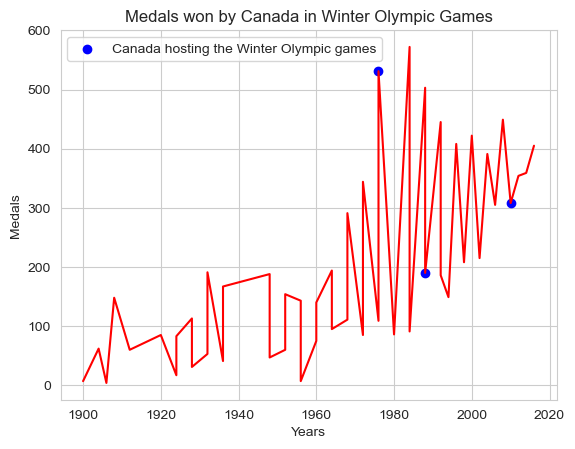

In [32]:
# Plot for Medals by Years
CAnada_sorted = Canada_df.sort_values('Year')

plt.plot(CAnada_sorted['Year'], CAnada_sorted['Medal_Count'], c='red')
plt.scatter(canada_host_df['Year'], canada_host_df['Medal_Count'], c='b', label='Canada hosting the Winter Olympic games')

# Title and Axis
plt.title('Medals won by Canada in Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [33]:
#Look into winter sports performed on Olympic games
winter_olympic_sports =athelete_merged_WINTER[athelete_merged_WINTER.Season=='Winter'].Sport.unique()
winter_olympic_sports

array(['Ice Hockey', 'Alpine Skiing', 'Speed Skating', 'Figure Skating',
       'Nordic Combined', 'Cross Country Skiing', 'Bobsleigh', 'Curling',
       'Ski Jumping', 'Short Track Speed Skating', 'Biathlon',
       'Freestyle Skiing', 'Luge', 'Snowboarding', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [34]:
#Look into summer sports performed on Olympic games
summer_olympic_sports = athelete_merged_SUMMER[athelete_merged_SUMMER.Season=='Summer'].Sport.unique()
summer_olympic_sports

array(['Tug-Of-War', 'Swimming', 'Gymnastics', 'Handball', 'Hockey',
       'Rowing', 'Football', 'Sailing', 'Cycling', 'Fencing', 'Taekwondo',
       'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Golf', 'Softball', 'Boxing', 'Basketball',
       'Diving', 'Baseball', 'Volleyball', 'Shooting', 'Judo',
       'Equestrianism', 'Tennis', 'Rugby Sevens', 'Rhythmic Gymnastics',
       'Weightlifting', 'Badminton', 'Beach Volleyball', 'Rugby',
       'Lacrosse', 'Synchronized Swimming', 'Archery', 'Triathlon',
       'Polo', 'Table Tennis', 'Cricket', 'Racquets', 'Croquet',
       'Art Competitions', 'Ice Hockey', 'Roque', 'Figure Skating',
       'Trampolining', 'Basque Pelota', 'Alpinism', 'Motorboating',
       'Jeu De Paume', 'Aeronautics'], dtype=object)